In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [43]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(rc=custom_params)

In [3]:
df = pd.read_csv('music_revenue_chart.csv')
df

,year,format,value_for_charting,year_date
0,2005,Cassette,13.1,2005
1,2015,CD Single,1.2,2015
2,2015,Paid Subscription,1156.7,2015
3,2017,Download Single,667.9,2017
4,1986,Vinyl Single,228.1,1986
...,...,...,...,...
467,2010,Vinyl Single,2.3,2010
468,1989,LP/EP,220.3,1989
469,1982,Vinyl Single,283.0,1982
470,2016,Ringtones & Ringbacks,56.3,2016


In [4]:
df.drop('year_date', axis=1, inplace=True)
df

,year,format,value_for_charting
0,2005,Cassette,13.1
1,2015,CD Single,1.2
2,2015,Paid Subscription,1156.7
3,2017,Download Single,667.9
4,1986,Vinyl Single,228.1
...,...,...,...
467,2010,Vinyl Single,2.3
468,1989,LP/EP,220.3
469,1982,Vinyl Single,283.0
470,2016,Ringtones & Ringbacks,56.3


In [5]:
pivot = df.pivot(index='year', columns='format', values='value_for_charting')
pivot.fillna(0, inplace=True)
pivot

format,8 - Track,CD,CD Single,Cassette,Cassette Single,DVD Audio,Download Album,Download Music Video,Download Single,Kiosk,...,On-Demand Streaming (Ad-Supported),Other Ad-Supported Streaming,Other Digital,Other Tapes,Paid Subscription,Ringtones & Ringbacks,SACD,SoundExchange Distributions,Synchronization,Vinyl Single
year,,,,,,,,,,,,,,,,,,,,,
1973,489.0,0.0,0.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,15.6,0.0,0.0,0.0,0.0,0.0,190.0
1974,549.2,0.0,0.0,87.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,13.3,0.0,0.0,0.0,0.0,0.0,194.0
1975,583.0,0.0,0.0,98.8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.2,0.0,0.0,0.0,0.0,0.0,211.5
1976,678.2,0.0,0.0,145.7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.1,0.0,0.0,0.0,0.0,0.0,245.1
1977,811.0,0.0,0.0,249.6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,245.1
1978,948.0,0.0,0.0,449.8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,260.3
1979,684.3,0.0,0.0,580.6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,353.6
1980,527.0,0.0,0.0,705.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0
1981,313.0,0.0,0.0,1062.8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,256.4


In [20]:
pivot['cd_all'] = pivot['CD'] + pivot['CD Single']
pivot['cassette_all'] = pivot['Cassette'] + pivot['Cassette Single']
pivot['downloads'] = pivot['Download Album'] + pivot['Download Music Video'] + pivot['Download Single']
pivot['vinyl_all'] = pivot['LP/EP'] + pivot['Vinyl Single']
pivot['streaming'] = pivot['SoundExchange Distributions'] + pivot['On-Demand Streaming (Ad-Supported)'] + pivot['Other Ad-Supported Streaming'] + pivot['Paid Subscription'] + pivot['Limited Tier Paid Subscription']
pivot['others'] = pivot['Music Video (Physical)'] + pivot['Kiosk'] + pivot['Other Digital'] + pivot['Other Tapes'] + pivot['SACD'] + pivot['Synchronization']

In [23]:
new_df = pivot[['8 - Track', 'vinyl_all', 'cassette_all', 'cd_all', 'downloads', 'Ringtones & Ringbacks','streaming',  'others']]

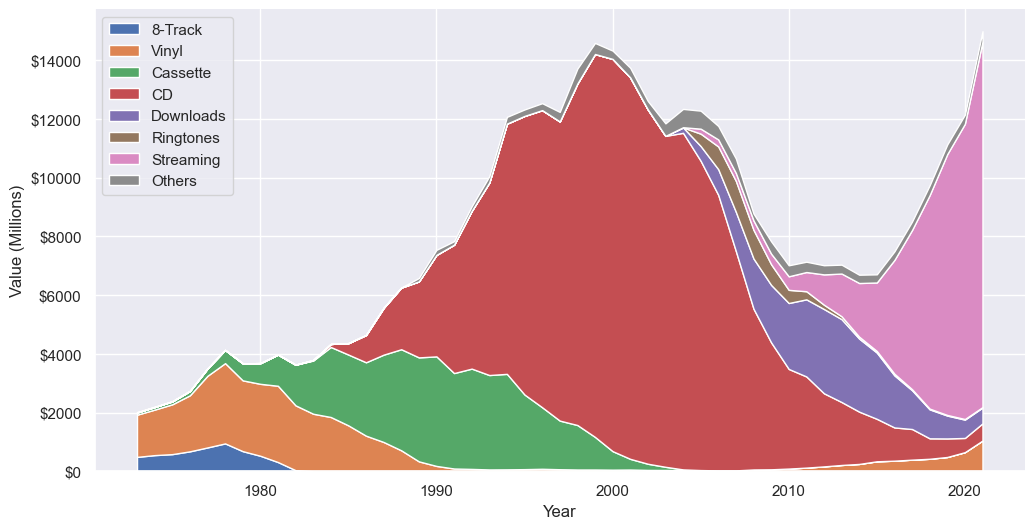

In [44]:
format_list = list(new_df.columns)
labels = ['8-Track', 'Vinyl', 'Cassette', 'CD', 'Downloads', 'Ringtones', 'Streaming', 'Others']
# pivot = pivot.apply(lambda x: x/sum(x), axis=1)

fig = plt.figure(figsize=[12, 6])
plt.stackplot(new_df.index, new_df[format_list].values.T, labels=labels)
plt.gca().yaxis.set_major_formatter('${x:1.0f}')
plt.gca().yaxis.set_tick_params(labelleft=True)
plt.legend(loc='upper left')
plt.ylabel('Value (Millions)')
plt.xlabel('Year')
plt.show()